# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business objective:

We are developing a used car pricing prediction model and validate the same for accurecy and minimizing error. This model may assist a used car dealership to serve their customers better, quick and satisfactorily by knowing their customers requirement and within budget. 

This prediction model aims to increase more business closure for dealers. Another way, dealer can also use this prediciton model to assess right price shen purchasing used car from sellers.
Not only help customer to find what they need within their budget, but also aim to improve customer satisfaction.

##### Approach

Use the 'used car' historical data and build appropriate price prediction ML model which identifies lists of principal components in the car that drives cost.

Detailing out the recommended features for principal components and proviing the same to the used car dealership, would help them serving their customers. This will also help them to rightly value a car pricing when buying inventory.

### Data Understanding:

Next step of CRISP-DM for developing Pricing predction model, is Data understanding.

We shall get familiar with our data(vehicles.csv). Analyzing dataset, correcting for missing data, changing data type to get ready for visualization and regresssion are few steps that we would follow to get fmiliar with the dataset.  Once becoming familiar with data, would help to establish next step for ML Modeling and ensuring the approach for business understanding.

##### Approach
Below are steps, we would follow for data understaning.

In [120]:
#import relevent libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [121]:
#reading data
low_memory=False
#vehicles = pd.read_csv('data/vehicles.csv',sep=',', dtype='unicode', parse_dates=['year'])
vehicles = pd.read_csv('data/vehicles.csv')

In [122]:
vehicles.info()
vehicles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [123]:
## understanding data size
vehicles.shape

(426880, 18)

In [124]:
## understaning data from sample
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [125]:
## statistical Details of data
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


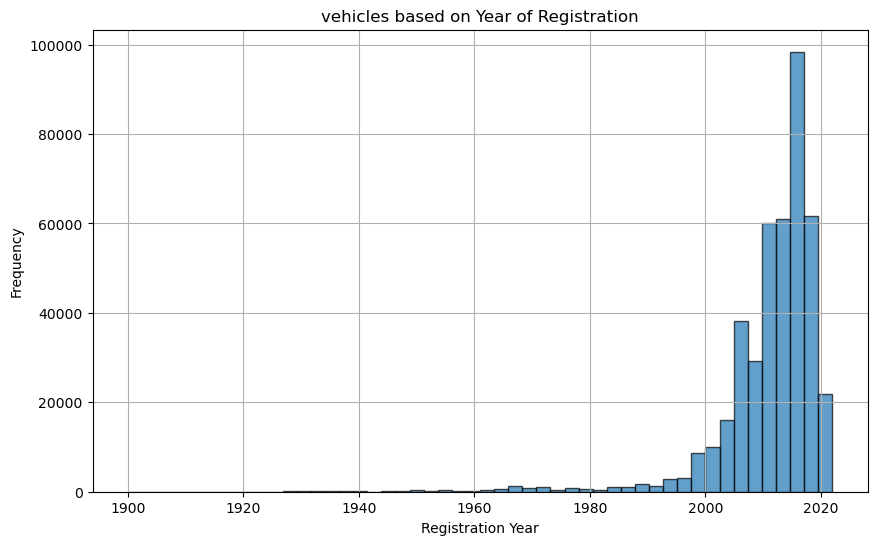

In [126]:
# plot to see how vehicles are distributed by year, this will give an idea of years where more vehicles registered/first sold

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(vehicles['year'], bins=50, edgecolor='black', alpha=0.7)
plt.title('vehicles based on Year of Registration')
plt.xlabel('Registration Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('images/histogram.png')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


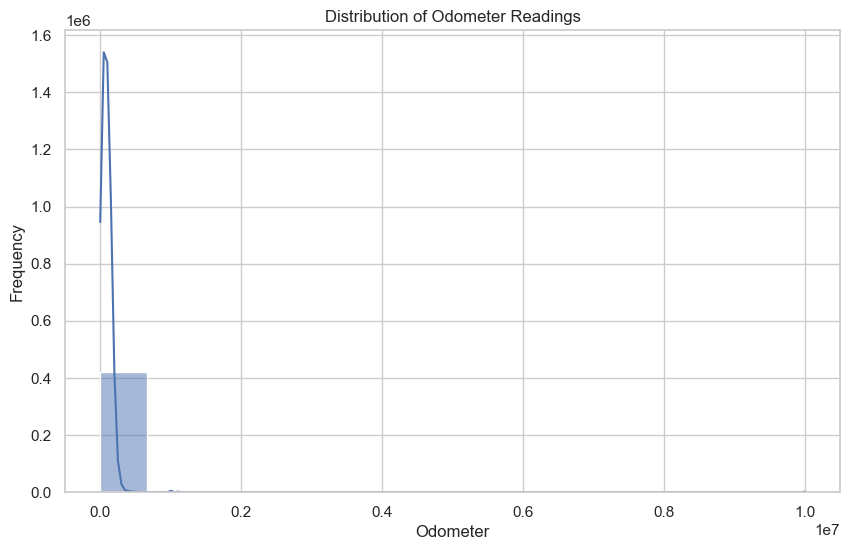

In [173]:
# Plot distribution of odometer 
import seaborn as sns 

  

# Set the visual style 
sns.set(style="whitegrid") 

  
plt.figure(figsize=(10, 6)) 
sns.histplot(vehicles['odometer'], bins=15, kde=True) 
plt.title('Distribution of Odometer Readings') 
plt.xlabel('Odometer') 
plt.ylabel('Frequency') 

plt.show() 

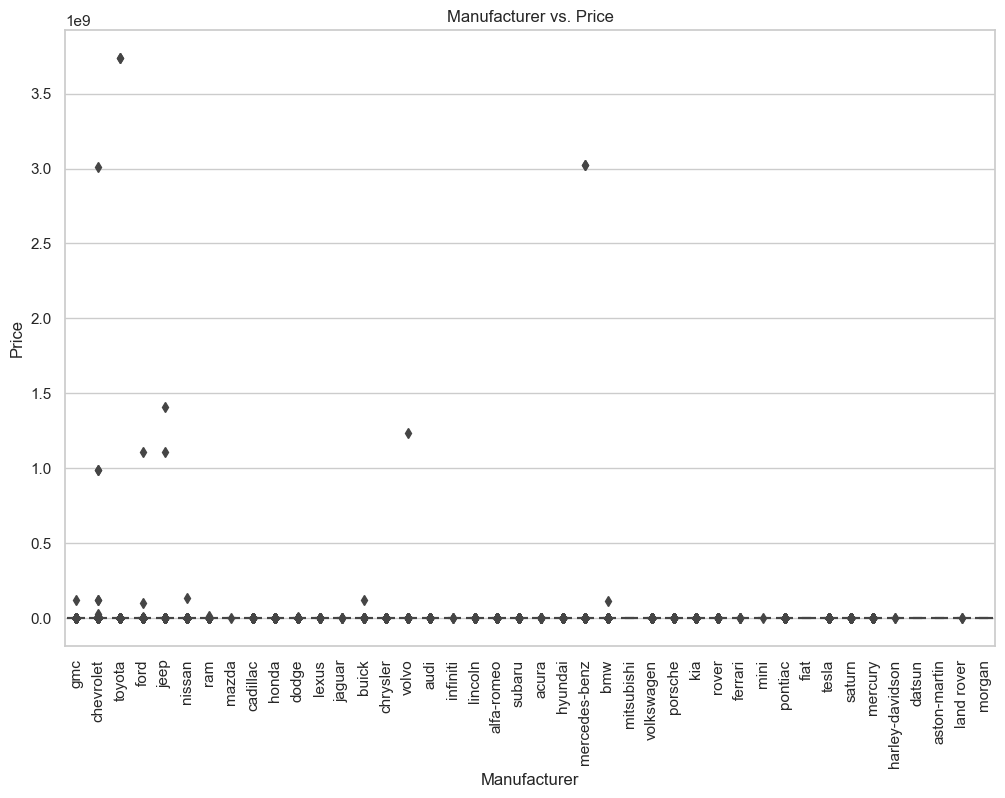

In [176]:
# Plot relationship between manufacturer and price 

plt.figure(figsize=(12, 8)) 
sns.boxplot(x='manufacturer', y='price', data=vehicles) 
plt.xticks(rotation=90) 
plt.title('Manufacturer vs. Price') 
plt.xlabel('Manufacturer') 
plt.ylabel('Price') 

plt.show() 

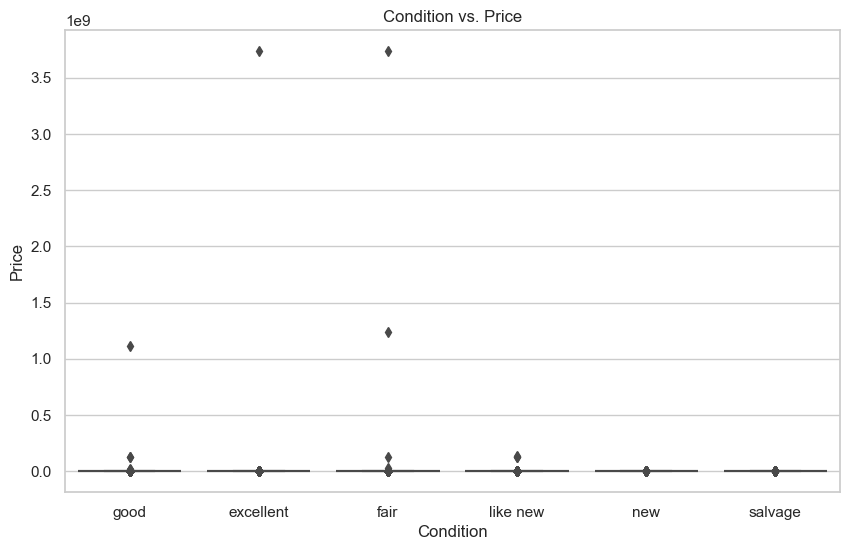

In [179]:
# Plot relationship between condition and price 

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='condition', y='price', data=vehicles) 
plt.title('Condition vs. Price') 
plt.xlabel('Condition') 
plt.ylabel('Price') 

plt.show() 

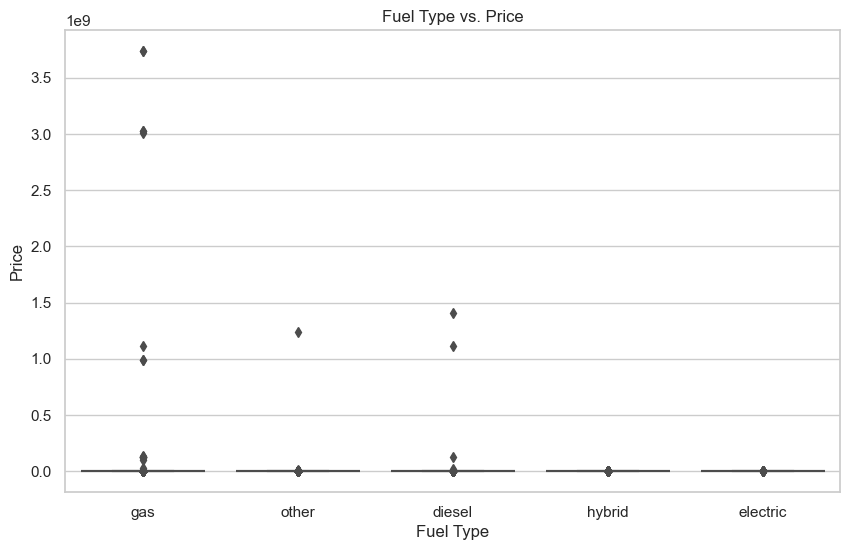

In [182]:
# Plot relationship between fuel type and price 

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='fuel', y='price', data=vehicles) 
plt.title('Fuel Type vs. Price') 
plt.xlabel('Fuel Type') 
plt.ylabel('Price') 

plt.show() 

####   Summary of Data Understanding:
* There is a total of 18 columns and 426K rows. 3 Columns are integer/floats.
* Other columns have data type as 'object' and some of them requires to transform as float/integer before analysis/train and prediction.
* There is a extremely high number of missing values, so we to correct than dropping the rows. This requires imputation to address this data issue.
* Most of the used cars were registered during 2010 and 2020. This gives ample time sequence for a decade to evolve prediction model.
* Some of the columns are insignificant and should be dropped. i.e. VIN
* Column like size, has most of the value(75%) missing. Such column may influence the AI/ML model adversely and may reason of high amount of prediction error. Such column should also be dropped.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [127]:
# Immediate need to address the column data types by converting them to appropriate ones.

vehicles2 = vehicles.convert_dtypes()
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [128]:
# Let's remove a few columns (id, region, VIN) that are not useful or insufficient for prediction.

vehicles2.drop(columns=['id','region','VIN','size'], inplace=True)

In [129]:
# Addressing the insignificant null values. Remove the null values from columns that has minimal null count.

vehicles2.dropna(subset=['year','model','fuel','odometer','title_status','transmission'], inplace=True)
vehicles2.isnull().sum()

price                0
year                 0
manufacturer     15990
model                0
condition       162527
cylinders       169060
fuel                 0
odometer             0
title_status         0
transmission         0
drive           121945
type             88729
paint_color     118219
state                0
dtype: int64

In [130]:
vehicles2.shape

(405594, 14)

* Replaced all the null categorical values into a constant which is relevent to the column

In [131]:
# All null values replaces with unique constant

vehicles2['manufacturer'].fillna('unknown_manufacturer', inplace=True)
vehicles2['condition'].fillna('unknown_condition', inplace=True)
vehicles2['cylinders'].fillna('unknown_cylinders', inplace=True)
vehicles2['drive'].fillna('unknown_drive', inplace=True)
vehicles2['type'].fillna('unknown_type', inplace=True)
vehicles2['paint_color'].fillna('unknown_paint_color', inplace=True)

In [132]:
# Final analysis of cleaned dataframe, should be free from null values in any row

vehicles2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [133]:
# odometer having significant value, diminish the car value to insignificant price. Hence may produce high value of error in prediction model.
# 75% of data having odometer value as 1.335425e+05.will slice the dataframe for lower odometer value with cutoff 150000
odometer_eliminate_thresold = 150000
vehicles3 = vehicles2[vehicles2['odometer']<=odometer_eliminate_thresold]

In [134]:
#checks and analysis of clean datafarme
vehicles3.shape

(332239, 14)

In [135]:
# Vehicle having very high price are data noise and should be eliminated. More than 75% car priced as 2.648575e+04. Hence safe cutoff would be 30000 

car_price_cutoff_thresold = 30000
vehicles3 = vehicles3[vehicles3['price']<=car_price_cutoff_thresold]

In [136]:
#Final checks and analysis of clean datafarme
vehicles3.shape

(259986, 14)

In [137]:
vehicles3['price'].value_counts().sort_values(ascending=False).head(10)


price
0        26907
29990     2625
25990     2258
27990     2217
7995      2127
8995      2040
6995      2037
26990     2017
9995      1974
24990     1855
Name: count, dtype: Int64

In [138]:
# Will update the price '0' with mean value. Apply this logic for upto price '50' as the count for this low range is high and the value is practically unlikely.

import numpy as np
vehicles3['price'] = np.where(vehicles3['price'] <= 50, round(vehicles3['price'].mean()), vehicles3['price'])

In [139]:
vehicles3['fuel'].value_counts().sort_values(ascending=False).head(10)


fuel
gas         229250
other        17254
diesel        8910
hybrid        3595
electric       977
Name: count, dtype: Int64

In [140]:
# We shall use target encoding technique to compare the categorical column with the target and replace values with appropriate mean values

vehicles3['fuel_encoded'] = vehicles3.groupby("fuel")["price"].transform("mean")
# Ensure the 'fuel_encoded' column is numeric
vehicles3['fuel_encoded'] = pd.to_numeric(vehicles3['fuel_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['fuel_encoded'].fillna(0, inplace=True)
vehicles3['fuel']=vehicles3['fuel_encoded'].round(0).astype(int)
vehicles3.drop(columns='fuel_encoded', inplace=True)

vehicles3['condition_encoded'] = vehicles3.groupby("condition")["price"].transform("mean")
# Ensure the 'condition_encoded' column is numeric
vehicles3['condition_encoded'] = pd.to_numeric(vehicles3['condition_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['condition_encoded'].fillna(0, inplace=True)
vehicles3['condition']=round(vehicles3['condition_encoded']).astype(int)
vehicles3.drop(columns='condition_encoded', inplace=True)

vehicles3['model_encoded'] = vehicles3.groupby("model")["price"].transform("mean")
# Ensure the 'model_encoded' column is numeric
vehicles3['model_encoded'] = pd.to_numeric(vehicles3['model_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['model_encoded'].fillna(0, inplace=True)
vehicles3['model']=round(vehicles3['model_encoded']).astype(int)
vehicles3.drop(columns='model_encoded', inplace=True)

vehicles3['manufacturer_encoded'] = vehicles3.groupby("manufacturer")["price"].transform("mean")
# Ensure the 'manufacturer_encoded' column is numeric
vehicles3['manufacturer_encoded'] = pd.to_numeric(vehicles3['manufacturer_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['manufacturer_encoded'].fillna(0, inplace=True)
vehicles3['manufacturer']=round(vehicles3['manufacturer_encoded']).astype(int)
vehicles3.drop(columns='manufacturer_encoded', inplace=True)

vehicles3['title_status_encoded'] = vehicles3.groupby("title_status")["price"].transform("mean")
# Ensure the 'title_status_encoded' column is numeric
vehicles3['title_status_encoded'] = pd.to_numeric(vehicles3['title_status_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['title_status_encoded'].fillna(0, inplace=True)
vehicles3['title_status']=round(vehicles3['title_status_encoded']).astype(int)
vehicles3.drop(columns='title_status_encoded', inplace=True)

vehicles3['transmission_encoded'] = vehicles3.groupby("transmission")["price"].transform("mean")
# Ensure the 'transmission_encoded' column is numeric
vehicles3['transmission_encoded'] = pd.to_numeric(vehicles3['transmission_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['transmission_encoded'].fillna(0, inplace=True)
vehicles3['transmission']=round(vehicles3['transmission_encoded']).astype(int)
vehicles3.drop(columns='transmission_encoded', inplace=True)

vehicles3['drive_encoded'] = vehicles3.groupby("drive")["price"].transform("mean")
# Ensure the 'drive_encoded' column is numeric
vehicles3['drive_encoded'] = pd.to_numeric(vehicles3['drive_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['drive_encoded'].fillna(0, inplace=True)
vehicles3['drive']=round(vehicles3['drive_encoded']).astype(int)
vehicles3.drop(columns='drive_encoded', inplace=True)

vehicles3['type_encoded'] = vehicles3.groupby("type")["price"].transform("mean")
# Ensure the 'type_encoded' column is numeric
vehicles3['type_encoded'] = pd.to_numeric(vehicles3['type_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['type_encoded'].fillna(0, inplace=True)
vehicles3['type']=round(vehicles3['type_encoded']).astype(int)
vehicles3.drop(columns='type_encoded', inplace=True)

vehicles3['paint_color_encoded'] = vehicles3.groupby("paint_color")["price"].transform("mean")
# Ensure the 'paint_color_encoded' column is numeric
vehicles3['paint_color_encoded'] = pd.to_numeric(vehicles3['paint_color_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['paint_color_encoded'].fillna(0, inplace=True)
vehicles3['paint_color']=round(vehicles3['paint_color_encoded']).astype(int)
vehicles3.drop(columns='paint_color_encoded', inplace=True)

vehicles3['state_encoded'] = vehicles3.groupby("state")["price"].transform("mean")
# Ensure the 'state_encoded' column is numeric
vehicles3['state_encoded'] = pd.to_numeric(vehicles3['state_encoded'], errors='coerce')
# Handle NaN values if any
vehicles3['state_encoded'].fillna(0, inplace=True)
vehicles3['state']=round(vehicles3['state_encoded']).astype(int)
vehicles3.drop(columns='state_encoded', inplace=True)

vehicles3.drop(columns=['cylinders'], inplace=True)

vehicles3.head()

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state
28,22590,2010,14601,18003,17271,14081,71229,14627,21862,14408,20801,14202,17402
31,15000,2013,14831,15739,13168,14081,128000,14627,13442,15984,16619,15779,17402
32,27990,2012,17516,25859,17271,14081,68696,14627,21862,16028,20801,15779,17402
35,29990,2016,14601,27819,17271,14081,17302,14627,21862,16028,20801,15309,17402
39,24590,2017,14601,25834,17271,14081,40784,14627,21862,14408,20801,16365,17402


In [141]:
# data type change

vehicles3['price'] = vehicles3['price'].astype(int)
vehicles3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259986 entries, 28 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         259986 non-null  int32
 1   year          259986 non-null  Int64
 2   manufacturer  259986 non-null  int32
 3   model         259986 non-null  int32
 4   condition     259986 non-null  int32
 5   fuel          259986 non-null  int32
 6   odometer      259986 non-null  Int64
 7   title_status  259986 non-null  int32
 8   transmission  259986 non-null  int32
 9   drive         259986 non-null  int32
 10  type          259986 non-null  int32
 11  paint_color   259986 non-null  int32
 12  state         259986 non-null  int32
dtypes: Int64(2), int32(11)
memory usage: 17.4 MB


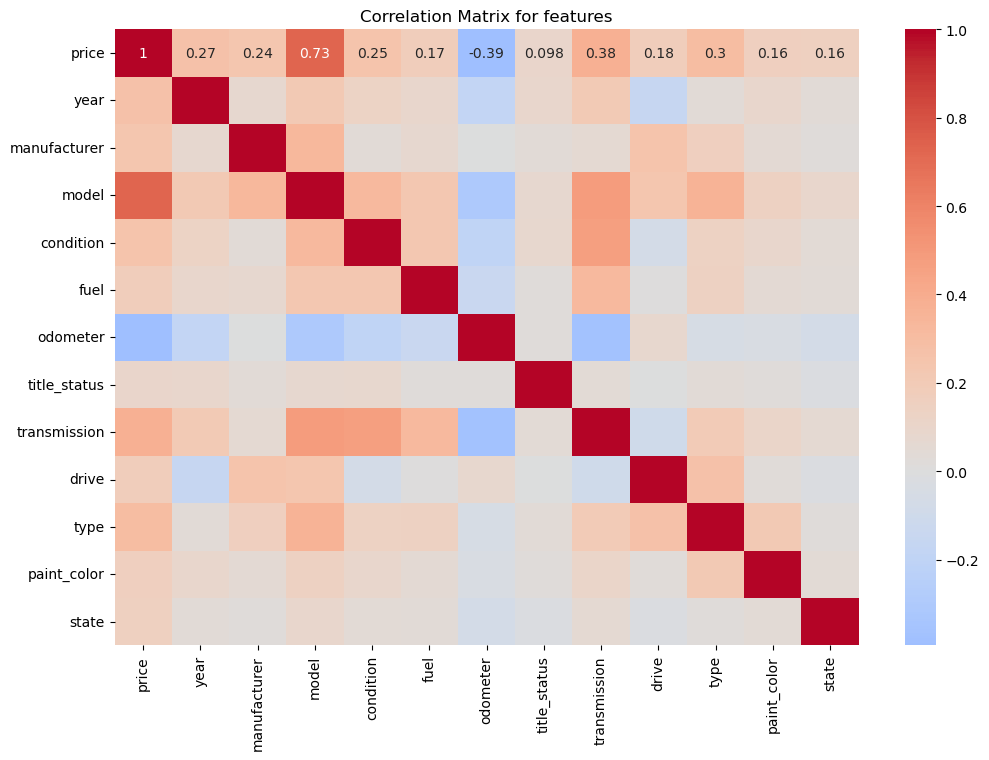

In [142]:
# Determine coorelation between features using corr function and plotting in a heat map for better readability

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(vehicles3.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for features')
plt.show()

In [143]:
#Above graph shows model is highly correlated with price.

#Recursive Feature Elimination (RFE)

#Helps eliminate less important features

In [144]:
# creating a function to split and return the data into train and test sets

from sklearn.model_selection import train_test_split

def split_data(df):
    X = vehicles3.drop('price', axis=1)
    y = vehicles3['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [145]:
# passing the dataset for split process

X_train, X_test, y_train, y_test = split_data(vehicles2)

In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# instantiate
model = LinearRegression()

# pick 5 features
rfe_selector = RFE(model, n_features_to_select=5)

# fit the model
rfe_selector.fit(X_train, y_train)

selected_features = X_train.columns[rfe_selector.support_]

print(selected_features)

Index(['year', 'model', 'title_status', 'paint_color', 'state'], dtype='object')


In [147]:
#Scale using Standard Scaler, decompose using PCA

#Helps scale numerical columns and build a dataframe after transforming from scaled columns

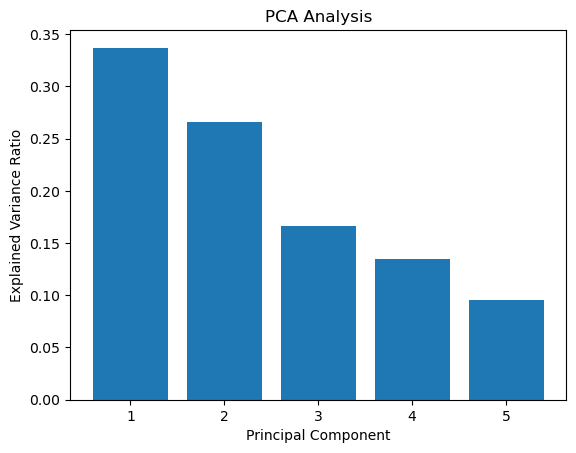

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pick the numerical columns
n_columns = ['price', 'year', 'odometer', 'drive', 'type']

# instantiate scaler & fit the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vehicles3[n_columns])

# instantiate princial component analysis & fit scaled data
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

In [149]:
explained_variance_ratio


array([0.3369985 , 0.26604357, 0.16648778, 0.13500991, 0.09546024])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [150]:
# dropping additional columns that are not much useful for analysis

vehicles4 = vehicles3.drop(columns=['manufacturer','condition','fuel','drive','type','odometer','transmission'])

In [151]:
vehicles4.head()

,price,year,model,title_status,paint_color,state
28,22590,2010,18003,14627,14202,17402
31,15000,2013,15739,14627,15779,17402
32,27990,2012,25859,14627,15779,17402
35,29990,2016,27819,14627,15309,17402
39,24590,2017,25834,14627,16365,17402


In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create train and test sets

X = vehicles4.drop('price', axis=1)
y = vehicles4['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

# training
lin_reg.fit(X_train, y_train)

# prediction
lin_reg_predict = lin_reg.predict(X_test)

# find mse error metric
lin_reg_mse = mean_squared_error(y_test, lin_reg_predict)

print("MSE:", lin_reg_mse)

y_test, lin_reg_predict

MSE: 26968384.189089756


(121113    28488
 394392    13055
 308613    13055
 263449    11990
 305433    13495
           ...  
 84526      2988
 27398     15998
 202025     7500
 376186     2000
 4454      17500
 Name: price, Length: 51998, dtype: int32,
 array([29872.30495565, 10888.11052027, 10912.18247139, ...,
         7992.38757035, 16335.66166187, 17215.15507958]))

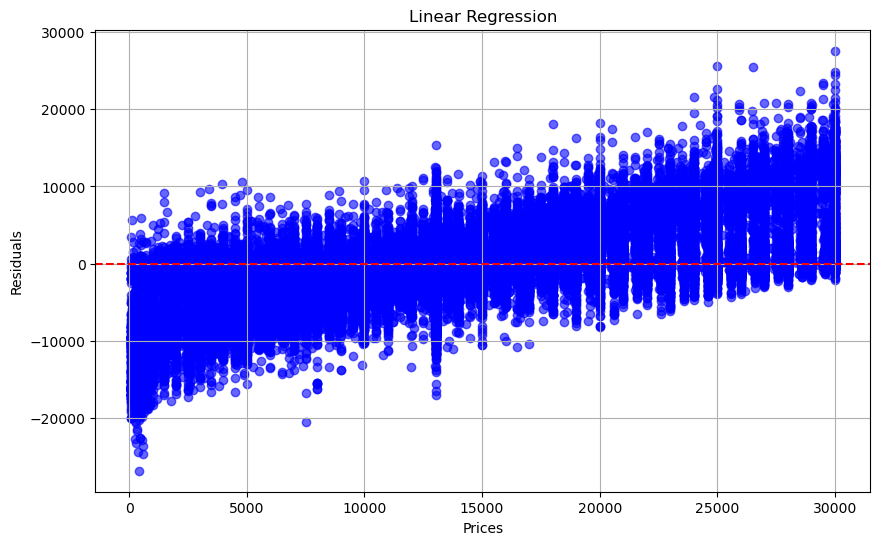

In [153]:
# determine residuals
lin_reg_residual = y_test - lin_reg_predict

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_reg_residual, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Linear Regression")
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

In [154]:
#Polynomial Features

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# instantiate
poly = PolynomialFeatures(degree=2)

# create polynomial features
X_poly = poly.fit_transform(vehicles4)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# instantiate and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# R**2
r2 = r2_score(y_test, y_pred)
print(f"R**2: {r2}")

MSE: 4.2345346107181177e-14
R**2: 1.0


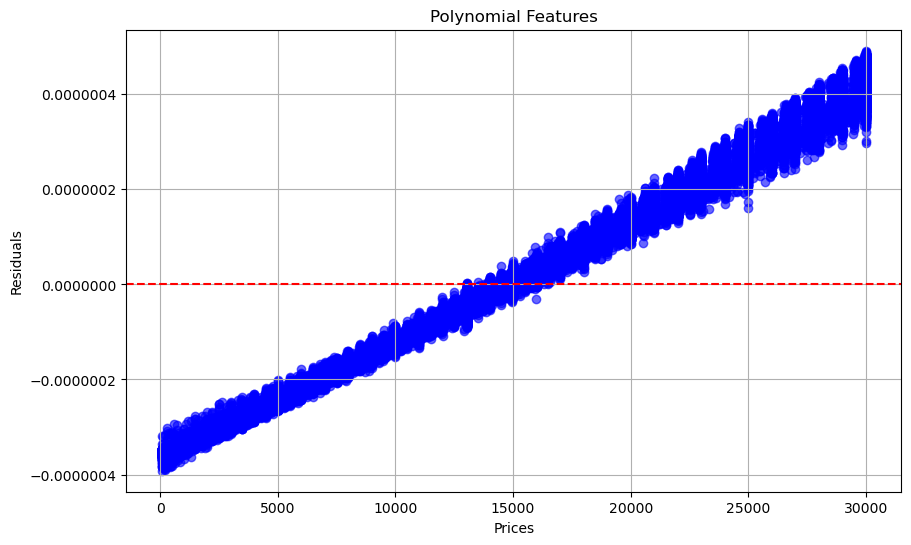

In [157]:
# residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Polynomial Features")
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

In [158]:
#Cross Validaition using Linear Regression Model



In [159]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# set folds
n_folds = 5

X = vehicles4
y = vehicles4['price']

# instantiate model
lin_reg_model = LinearRegression()

# instantiate metric
scorer = make_scorer(mean_squared_error)

# K-Fold Cross Validation for Linear Regression model
lin_reg_scores = cross_val_score(lin_reg_model, X, y, cv=n_folds, scoring=scorer)
lin_reg_mse = lin_reg_scores.mean()

print("CV Mean Squared Error:", lin_reg_mse)

CV Mean Squared Error: 1.5057555271126403e-20


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


Initially, through correlation, we could say 'model' is strongly correlated to the 'price' and could be a primary factor for used car price.

Also, through RFE process, we could arrive at the following features as most impactful ones among all for price determination Those are year, model, odometer, tramission and state.

Evaluation & Outcomes

In the model building process, we did use Linear Regression model and Polynomial Features. We did determine mean squared error ( MSE: 26968384.189089756) but that was significantly high and unusual for the data used. We also determined mean squared error and R square using ploynomial features. They were MSE: 4.2345346107181177e-14, R**2: 1.0.

We have determined the residuals in each approach and plotted it against the prices. The values in the graph were having clear trend.

For evaluation, we have used the Cross Validation technique. It produced mean square error of 2.27e-15. There are other techniques which can also be used.

Next Steps

Dataset required some more cleaning. We did use target encoding with mean values. It doesn't appear to be the best approach. We need to try out different techniques to handle the missing values, as data preparation is the key for success.

Assumptions made to replace impossible values such as 0 price, 0 odometer were replaced with mean values and that could be impacting the results. Need further analysis to improve model.

The primary challenge was handling the categorical features. We had a many categorical features and especially few had several distinct values with no ordinal values. This limited us using tehcniques such as one hot encoding but rather forced to use target encoding. One of the drawbacks was overfitting. We have to explore more to find a best technique to handle categorical features.


To improve the model's performance, we'll perform additional feature engineering. Here are the steps we may take: 

- Feature Engineering and Selection: Explore more advanced feature engineering and selection techniques to improve model performance. 
- Modeling with More Advanced Techniques: Consider using more advanced regression techniques 


Create new features: 
1. age: Calculate the age of the vehicle from the year. 
2. mileage_per_year: Calculate the average mileage per year. 

Transform skewed features: 
1Apply log transformation to the price and odometer variables to reduce skewness. 

Remove outliers: 
Identify and remove outliers in the price and odometer columns. 

Re-encode categorical variables: 
Simplify categorical variables and re-encode them as before. 

